<a href="https://colab.research.google.com/github/Hiteshsharma108/My_Data_Analytics_Codes/blob/main/Hitesh_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1. Data Understanding & Cleaning
#         a) Load the dataset

In [3]:
df = pd.read_csv("/content/Students Social Media Addiction (1).csv")

In [4]:
df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [38]:
df.describe(include="object")

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
count,705,705,705,705,705,705
unique,2,3,110,12,2,3
top,Female,Undergraduate,India,Instagram,Yes,Single
freq,353,353,53,249,453,384


In [10]:
print(df.shape)


(705, 13)


# b) Handle missing values, if any

In [11]:
print(df.isnull().sum())

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [36]:
print(df.nunique())

Student_ID                      705
Age                               7
Gender                            2
Academic_Level                    3
Country                         110
Avg_Daily_Usage_Hours            67
Most_Used_Platform               12
Affects_Academic_Performance      2
Sleep_Hours_Per_Night            59
Mental_Health_Score               6
Relationship_Status               3
Conflicts_Over_Social_Media       6
Addicted_Score                    8
dtype: int64


# c) Perform appropriate data type conversions if required.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

# 2. Exploratory Data Analysis (EDA)

In [23]:
# Relationship between Gender and Daily Usage
print(df.groupby("Gender")["Avg_Daily_Usage_Hours"].mean())

Gender
Female    5.011048
Male      4.826136
Name: Avg_Daily_Usage_Hours, dtype: float64


In [45]:
# Sleep patterns across Countries
df_country_sleep =df.groupby("Country")["Sleep_Hours_Per_Night"].mean().sort_values(ascending=False)
print(df_country_sleep)

Country
Switzerland       8.277778
Denmark           8.196296
Netherlands       8.175000
Germany           7.942857
Japan             7.938095
                    ...   
Ecuador           5.200000
Czech Republic    5.200000
Liechtenstein     5.200000
Lebanon           5.200000
Trinidad          5.200000
Name: Sleep_Hours_Per_Night, Length: 110, dtype: float64


In [46]:
#Addicted score on various Platform
df_add_plat =df.groupby("Most_Used_Platform")["Addicted_Score"].mean().sort_values(ascending=False)
print(df_add_plat)

Most_Used_Platform
WhatsApp     7.462963
Snapchat     7.461538
TikTok       7.428571
Instagram    6.554217
YouTube      6.100000
WeChat       6.066667
KakaoTalk    6.000000
Facebook     5.666667
Twitter      5.500000
VKontakte    5.000000
LinkedIn     3.809524
LINE         3.000000
Name: Addicted_Score, dtype: float64


In [30]:
# Relationship between Academic vs Usage
print(df[['Avg_Daily_Usage_Hours', 'Addicted_Score']].corr())

                       Avg_Daily_Usage_Hours  Addicted_Score
Avg_Daily_Usage_Hours                  1.000           0.832
Addicted_Score                         0.832           1.000


as avg daily usage increases addiction rate is also increasing.

In [26]:
# Relationship between Sleep vs Usage
print(df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night']].corr())

                       Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night
Avg_Daily_Usage_Hours               1.000000              -0.790582
Sleep_Hours_Per_Night              -0.790582               1.000000


we can observe that sleeping hours are highly affected by increasing daily usage.

# 3. Aggregation & Insights

In [32]:
# Average addiction level across genders
print(df.groupby("Gender")["Avg_Daily_Usage_Hours"].mean())

Gender
Female    5.011048
Male      4.826136
Name: Avg_Daily_Usage_Hours, dtype: float64


In [48]:
# Age groups
bins = [0, 15, 18, 22, 26, 100]
labels = ["≤15", "16–18", "19–22", "23–26", "27+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

print(df.groupby("AgeGroup")["Avg_Daily_Usage_Hours"].mean())

AgeGroup
≤15           NaN
16–18    5.385714
19–22    4.925198
23–26    4.741667
27+           NaN
Name: Avg_Daily_Usage_Hours, dtype: float64


/tmp/ipython-input-4054838444.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeGroup")["Avg_Daily_Usage_Hours"].mean())


In [52]:
# Education levels
print(df.groupby("Academic_Level")["Avg_Daily_Usage_Hours"].mean().sort_values(ascending=False))

Academic_Level
High School      5.544444
Undergraduate    5.001416
Graduate         4.776923
Name: Avg_Daily_Usage_Hours, dtype: float64


# 4. Functions, Loops, Conditionals

In [53]:
# Function to classify risk level
def classify_risk(hours):
    if hours < 2:
        return "Low"
    elif hours < 4:
        return "Medium"
    else:
        return "High"

df["RiskLevel"] = df["Avg_Daily_Usage_Hours"].apply(classify_risk)

In [54]:
# Function to suggest detox strategy
def detox_strategy(risk):
    if risk == "Low":
        return "Maintain 2-hour cap, limit notifications"
    elif risk == "Medium":
        return "Set app timers, no-phone before bed"
    else:
        return "Uninstall addictive apps, grayscale mode, counselor help"

df["DetoxSuggestion"] = df["RiskLevel"].apply(detox_strategy)

In [56]:
print(df[["Avg_Daily_Usage_Hours", "RiskLevel", "DetoxSuggestion"]].head(10))

   Avg_Daily_Usage_Hours RiskLevel  \
0                    5.2      High   
1                    2.1    Medium   
2                    6.0      High   
3                    3.0    Medium   
4                    4.5      High   
5                    7.2      High   
6                    1.5       Low   
7                    5.8      High   
8                    4.0      High   
9                    3.3    Medium   

                                     DetoxSuggestion  
0  Uninstall addictive apps, grayscale mode, coun...  
1                Set app timers, no-phone before bed  
2  Uninstall addictive apps, grayscale mode, coun...  
3                Set app timers, no-phone before bed  
4  Uninstall addictive apps, grayscale mode, coun...  
5  Uninstall addictive apps, grayscale mode, coun...  
6           Maintain 2-hour cap, limit notifications  
7  Uninstall addictive apps, grayscale mode, coun...  
8  Uninstall addictive apps, grayscale mode, coun...  
9                Set app timers

# 5. Data Visualization (4+ types)

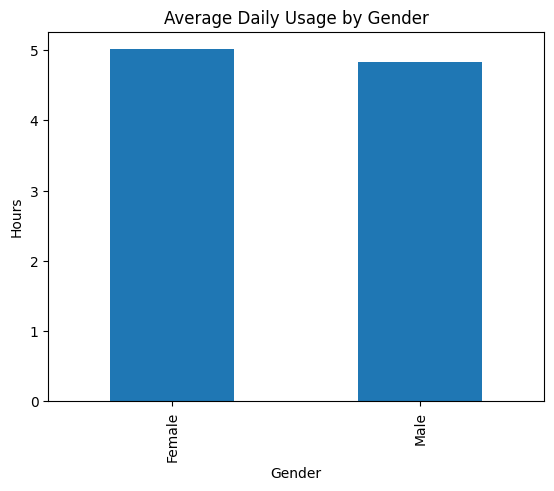

In [60]:
# (A) Bar Chart: Usage by Gender
df.groupby("Gender")["Avg_Daily_Usage_Hours"].mean().plot(kind="bar")
plt.title("Average Daily Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Hours")
plt.show()

Females have higher daily usage hours than males.

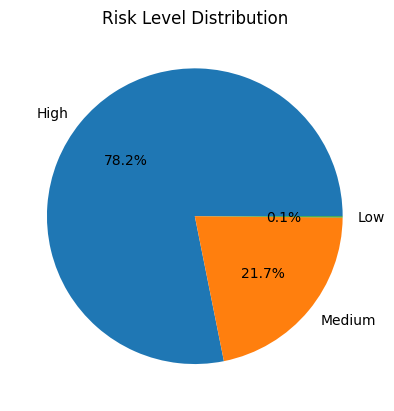

In [63]:
# (B) Pie Chart: Risk Levels
df["RiskLevel"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Risk Level Distribution")
plt.ylabel("")
plt.show()

Almost 80% people are in high risk zone. Only 0.1% persons are in Low high zone.

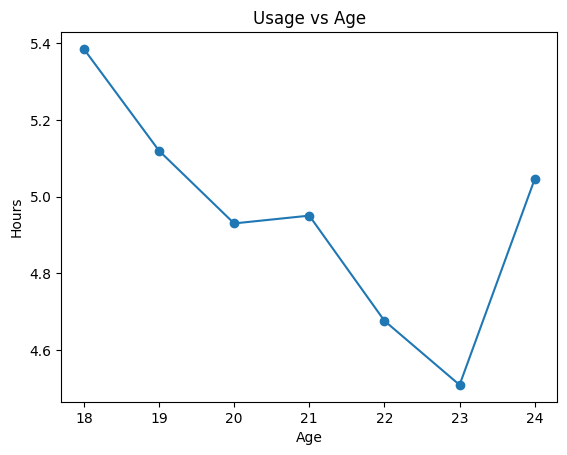

In [65]:
# (C) Line Plot: Usage vs Age
df.groupby("Age")["Avg_Daily_Usage_Hours"].mean().plot(kind="line", marker="o")
plt.title("Usage vs Age")
plt.xlabel("Age")
plt.ylabel("Hours")
plt.show()

As we examine that, age group of 18 years adults have higher usage than rest.

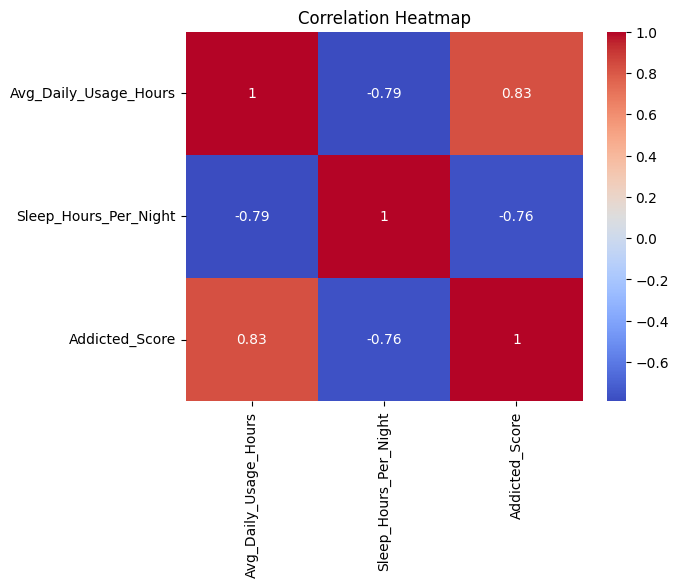

In [69]:
# (D) Heatmap: Correlation
sns.heatmap(df[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Addicted_Score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 6. Storytelling Deliverable (10-line summary)

1. Average daily usage is 4.92 hours.
2. High risk is most common.
3. Males/Females show clear differences in average usage.
4. Highest usage is in the 19–22 age group.
5. Sleep hours show a negative correlation with usage.
6. Academic performance decreases as usage increases.
7. Low-risk students balance time well (<2 hrs).
8. Medium-risk students need app timers and curfews.
9. High-risk students require structured detox programs.
10. Institutions must promote offline activities to fight addiction.